<a href="https://colab.research.google.com/github/shinobu357/TugasMLRaisya/blob/main/UAS/Chapter_1_Computer_Vision_Raisya_Athaya_Kamilah_101032380253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 1 - Fundamentals

Unit ini menjelaskan konsep dasar-dasar, aplikasi, dan definisi computer vision. Computer Vision adalah ilmu dan teknologi yang membuat mesin atau komputer dapat melihat. Computer Vision melibatkan pengembangan metode teoritis dan algoritmik untuk memperoleh, memproses, menganalisis, dan memahami data visual, serta menggunakan informasi ini untuk menghasilkan representasi, deskripsi, dan interpretasi yang bermakna tentang dunia. Aplikasi computer vision mencakup berbagai bidang seperti kendaraan otonom, ritel dan e-commerce, kontrol kualitas di lini perakitan, dan analisis citra medis.

# Feature Matching

Feature Matching adalah fitur yang melibatkan perbandingan atribut utama dalam gambar yang berbeda untuk menemukan kesamaan. Feature Matching berguna dalam banyak aplikasi computer vision, termasuk pemahaman pemandangan, image stitching, object tracking, and pattern recognition.

# Brute-Force Search

Brute force search adalah metode pencarian sederhana dan langsung di mana semua kemungkinan kandidat diperiksa satu per satu hingga ditemukan solusi yang cocok. Dalam konteks feature matching pada pengolahan citra, brute force search berarti membandingkan setiap fitur atau deskriptor dalam satu gambar dengan semua fitur atau deskriptor di gambar lainnya untuk menemukan pasangan yang cocok

SIFT (Scale-Invariant Feature Transform) mendeteksi fitur yang lebih kompleks dan lebih tahan terhadap perubahan skala, rotasi, dan pencahayaan. Brute force SIFT menggunakan perbandingan jarak Euclidean untuk mencocokkan deskriptor.

ORB (Oriented FAST and Rotated BRIEF) lebih cepat dan efisien, menggunakan teknik binarization dan pencocokan berdasarkan perbandingan bitwise, yang membuatnya lebih ringan dibandingkan SIFT meskipun sedikit kurang akurat pada kasus-kasus tertentu.

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import numpy as np

In [ ]:
# Load images in grayscale
img1 = cv2.imread('/content/drive/MyDrive/kastil1.jpg', cv2.IMREAD_GRAYSCALE)  # Gambar pertama
img2 = cv2.imread('/content/drive/MyDrive/kastil2.jpg', cv2.IMREAD_GRAYSCALE)  # Gambar kedua

In [ ]:
# Inisialisasi objek SIFT untuk mendeteksi fitur
sift = cv2.SIFT_create()

In [ ]:
# Mendeteksi keypoints dan menghitung deskriptor untuk gambar pertama dan kedua
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [ ]:
# Membuat objek BFMatcher untuk mencocokkan deskriptor
bf = cv2.BFMatcher()
# Mencocokkan deskriptor antara gambar pertama dan kedua menggunakan k-NN
matches = bf.knnMatch(des1, des2, k=2)

In [ ]:
# Menyaring kecocokan yang valid berdasarkan jarak
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Jika jarak kecocokan pertama lebih kecil dari 75% jarak kecocokan kedua
        good.append([m])

In [ ]:
# Menggambar hasil kecocokan antara gambar pertama dan kedua menggunakan metode k-NN
img3 = cv2.drawMatchesKnn(
    img1, kp1, img2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

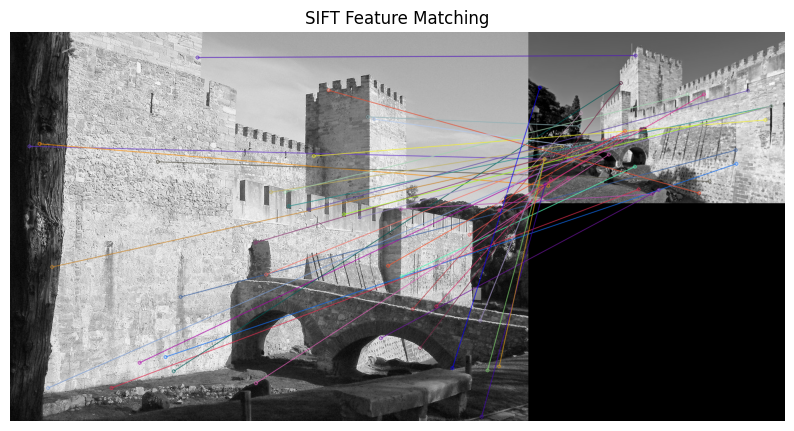

In [ ]:
# Menampilkan gambar hasil visualisasi SIFT dengan Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))  # Mengubah BGR ke RGB agar tampil di Matplotlib
plt.title('SIFT Feature Matching')  # Judul gambar
plt.axis('off')  # Menyembunyikan sumbu koordinat
plt.show()

In [ ]:
# Inisialisasi objek ORB untuk mendeteksi fitur
orb = cv2.ORB_create()

In [ ]:
# Mendeteksi keypoints dan menghitung deskriptor untuk gambar pertama dan kedua
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [ ]:
# Membuat objek BFMatcher untuk ORB (menggunakan NORM_HAMMING karena deskriptor ORB biner)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [ ]:
# Mencocokkan deskriptor antara gambar pertama dan kedua menggunakan BFMatcher
matches = bf.match(des1, des2)

In [ ]:
# Mengambil 50 kecocokan terbaik
n = 50
img3 = cv2.drawMatches(
    img1,
    kp1,
    img2,
    kp2,
    matches[:n],  # Menampilkan 50 kecocokan terbaik
    None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
)


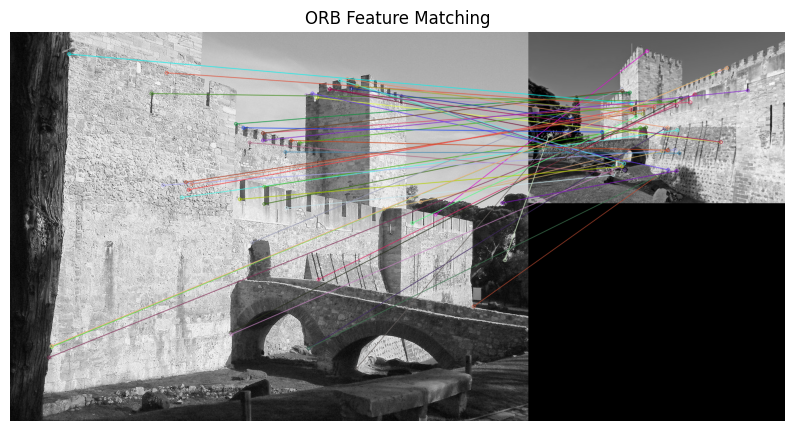

In [ ]:
# Menampilkan gambar hasil visualisasi ORB dengan Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))  # Mengubah BGR ke RGB agar tampil di Matplotlib
plt.title('ORB Feature Matching')  # Judul gambar
plt.axis('off')  # Menyembunyikan sumbu koordinat
plt.show()

# Fast Library for Approximate Nearest Neighbors (FLANN)

Fast Library for Approximate Nearest Neighbors (FLANN) adalah algoritma yang dirancang untuk menemukan tetangga terdekat (nearest neighbors) secara cepat dan efisien dalam dataset besar. FLANN menggunakan struktur data seperti k-D means untuk mengorganisir data dan membuat pencarian lebih efisien. FLANN menggunakan pendekatan yang lebih pintar daripada brute force untuk mencocokkan fitur atau deskriptor dalam konteks seperti pengolahan citra dan computer vision.

In [ ]:
# Menentukan parameter untuk FLANN dengan menggunakan k-D tree
FLANN_INDEX_KDTREE = 1  # Menentukan algoritma pencarian k-D tree
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)  # Menyusun parameter untuk k-D tree dengan 5 pohon pencarian

In [ ]:
FLANN_INDEX_LSH = 6  # Alternatif algoritma pencarian menggunakan LSH
index_params = dict(
    algorithm=FLANN_INDEX_LSH, table_number=12, key_size=20, multi_probe_level=2
)  # Menyusun parameter untuk LSH

In [ ]:
search_params = dict(checks=50)  # Menentukan jumlah pemeriksaan untuk pencocokan (lebih tinggi lebih akurat)

In [ ]:
# Menggunakan SIFT untuk mendeteksi dan mengekstrak fitur dari gambar
sift = cv2.SIFT_create()  # Membuat objek SIFT untuk ekstraksi fitur

In [ ]:
kp1, des1 = sift.detectAndCompute(img1, None)  # Deteksi dan komputasi fitur untuk gambar pertama
kp2, des2 = sift.detectAndCompute(img2, None)  # Deteksi dan komputasi fitur untuk gambar kedua

In [ ]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
# Membuat objek FLANN-based Matcher dengan parameter yang telah disiapkan
flann = cv2.FlannBasedMatcher(index_params, search_params)  # Membuat matcher FLANN untuk pencocokan deskriptor

#Mencocokkan deskriptor menggunakan k-NN (k-nearest neighbors)
matches = flann.knnMatch(des1, des2, k=2)  # Menggunakan FLANN untuk pencocokan dengan k=2 tetangga terdekat

In [ ]:
# Menyaring kecocokan menggunakan perbandingan jarak untuk mendapatkan kecocokan yang lebih baik
matchesMask = [[0, 0] for i in range(len(matches))]  # Membuat mask untuk menyaring hasil kecocokan

In [ ]:
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:  # Jika jarak kecocokan pertama lebih kecil dari 0.7 * jarak kecocokan kedua
        matchesMask[i] = [1, 0]  # Menandai kecocokan valid

In [ ]:
# Menyusun parameter untuk menggambar hasil pencocokan
draw_params = dict(
    matchColor=(0, 255, 0),  # Warna garis pencocokan hijau
    singlePointColor=(255, 0, 0),  # Warna titik fitur merah
    matchesMask=matchesMask,  # Menandai kecocokan yang valid
    flags=cv2.DrawMatchesFlags_DEFAULT,  # Menggunakan pengaturan default untuk menggambar kecocokan
)

# Menggambar gambar yang menunjukkan hasil pencocokan fitur antara dua gambar
img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)  # Menggambar kecocokan

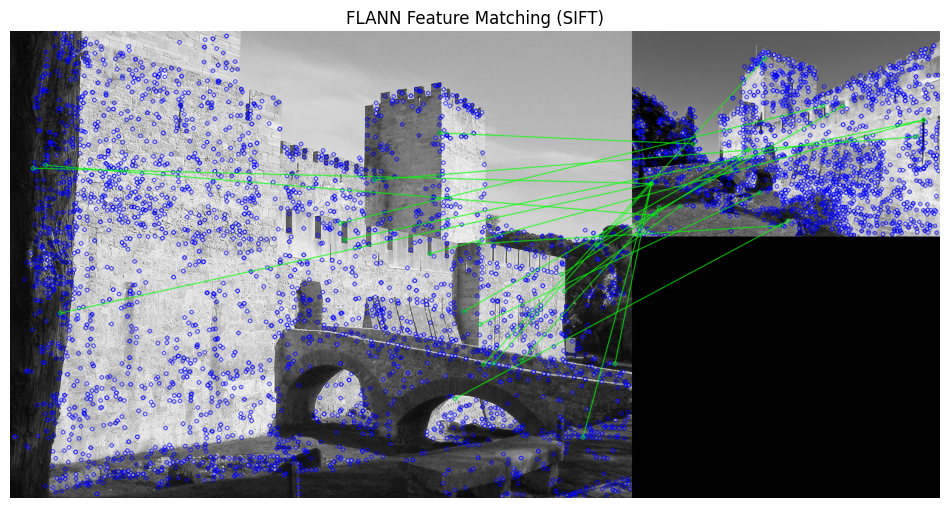

In [ ]:
# Menampilkan gambar hasil pencocokan menggunakan matplotlib
plt.figure(figsize=(12, 8))  # Menentukan ukuran gambar yang akan ditampilkan
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))  # Mengonversi gambar dari BGR ke RGB untuk visualisasi
plt.title('FLANN Feature Matching (SIFT)')  # Menambahkan judul pada gambar
plt.axis('off')  # Menghilangkan sumbu pada gambar
plt.show()  # Menampilkan gambar

# Local Feature Matching with Transformers (LoFTR)


Local Feature Matching with Transformers (LoFTR) adalah metode yang digunakan untuk mencocokkan fitur antara dua gambar dengan menggunakan Transformers, sebuah teknik machine learning yang awalnya digunakan dalam pemrosesan bahasa alami. Berbeda dengan metode tradisional yang menggunakan detektor fitur, LoFTR mengambil pendekatan berbasis pembelajaran untuk mencocokkan fitur-fitur lokal antara dua gambar

In [ ]:
!pip install kornia  kornia-rs  kornia_moons opencv-python --upgrade

In [ ]:
import cv2
import kornia as K
import kornia.feature as KF
import matplotlib.pyplot as plt
import numpy as np
import torch
from kornia_moons.viz import draw_LAF_matches  # Modul untuk visualisasi kecocokan fitur
from kornia.feature import LoFTR  # Modul untuk fitur LoFTR

In [ ]:
# Memuat gambar dengan kornia, gambar dibaca dalam format RGB32
img1 = K.io.load_image('/content/drive/MyDrive/kastil1.jpg', K.io.ImageLoadType.RGB32)[None, ...]  # Memuat gambar pertama
img2 = K.io.load_image('/content/drive/MyDrive/kastil2.jpg', K.io.ImageLoadType.RGB32)[None, ...]  # Memuat gambar kedua

# Resize gambar agar keduanya berukuran 512x512 pixel
img1 = K.geometry.resize(img1, (512, 512), antialias=True)  # Meresize gambar pertama
img2 = K.geometry.resize(img2, (512, 512), antialias=True)  # Meresize gambar kedua

In [ ]:
# Menyiapkan matcher LoFTR menggunakan model pretrained outdoor
matcher = LoFTR(pretrained="outdoor")  # Inisialisasi LoFTR dengan model outdoor yang sudah dilatih sebelumnya

In [ ]:
# Menyiapkan input untuk pencocokan fitur dengan mengubah gambar ke grayscale
input_dict = {
    "image0": K.color.rgb_to_grayscale(img1),  # Gambar pertama diubah menjadi grayscale
    "image1": K.color.rgb_to_grayscale(img2),  # Gambar kedua diubah menjadi grayscale
}

In [ ]:
# Melakukan pencocokan fitur menggunakan LoFTR dalam mode inferensi
with torch.inference_mode():  # Menggunakan mode inferensi untuk menghemat sumber daya
    correspondences = matcher(input_dict)  # Melakukan pencocokan fitur antara gambar pertama dan kedua

In [ ]:
# Mendapatkan keypoints (titik fitur) dari hasil pencocokan
mkpts0 = correspondences["keypoints0"].cpu().numpy()  # Titik fitur pada gambar pertama
mkpts1 = correspondences["keypoints1"].cpu().numpy()  # Titik fitur pada gambar kedua

# Menemukan fundamental matrix, yang menggambarkan hubungan geometris antara dua gambar
Fm, inliers = cv2.findFundamentalMat(mkpts0, mkpts1, cv2.USAC_MAGSAC, 0.5, 0.999, 100000)  # Mencari matriks fundamental
inliers = inliers > 0  # Memfilter titik yang termasuk dalam pencocokan yang valid (inliers)

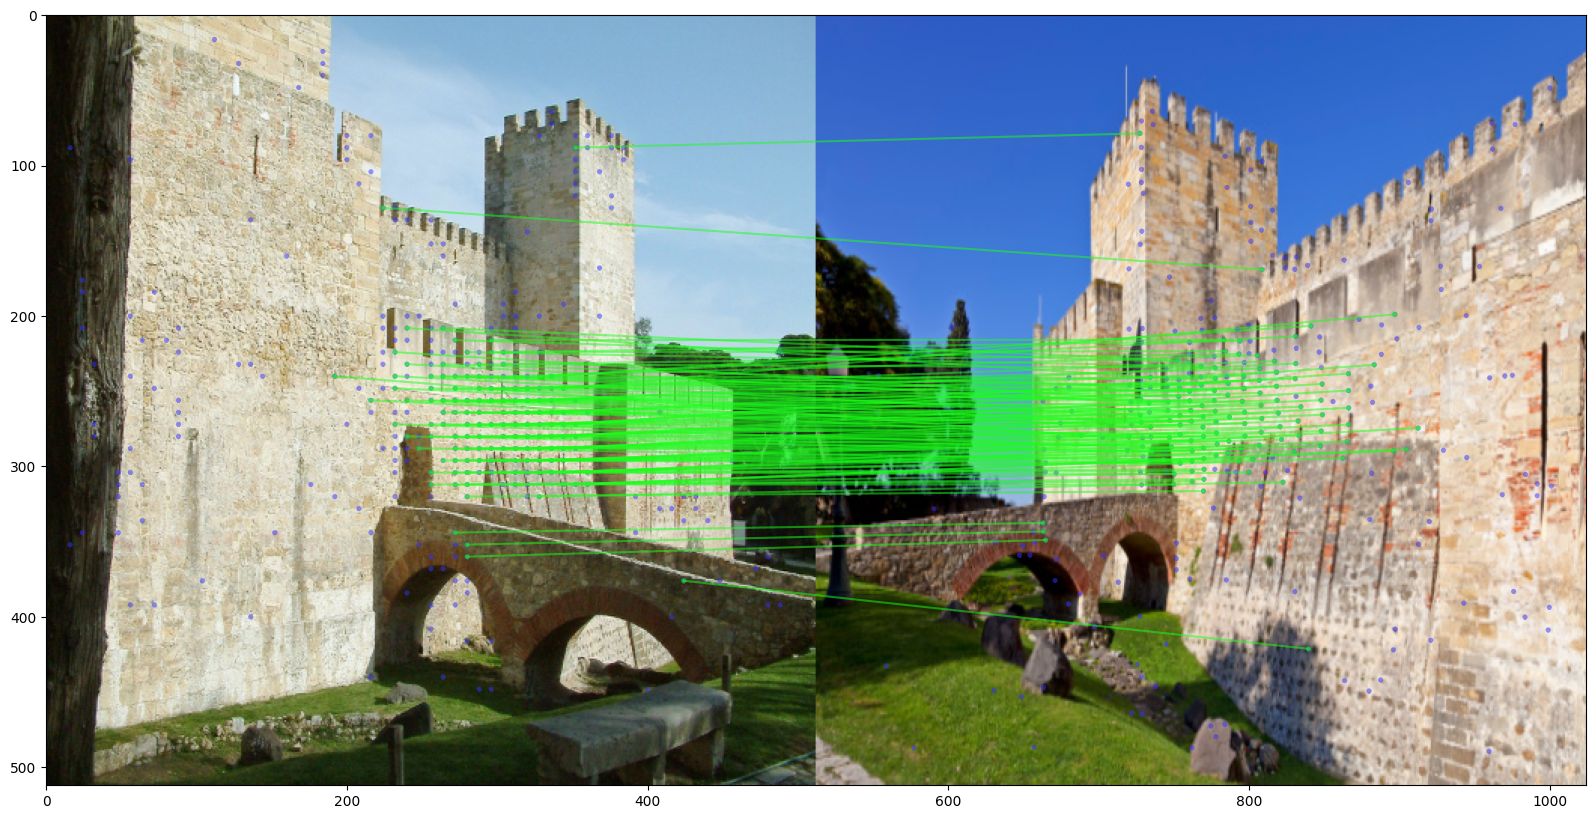

In [ ]:
# Menggambar hasil kecocokan fitur antara dua gambar
draw_LAF_matches(
    KF.laf_from_center_scale_ori(  # Mengonversi keypoints menjadi LAF (Local Affine Frames)
        torch.from_numpy(mkpts0).view(1, -1, 2),  # Titik fitur pada gambar pertama
        torch.ones(mkpts0.shape[0]).view(1, -1, 1, 1),  # Skala (set ke 1 untuk setiap titik)
        torch.ones(mkpts0.shape[0]).view(1, -1, 1),  # Orientasi (set ke 1 untuk setiap titik)
    ),
    KF.laf_from_center_scale_ori(  # Mengonversi keypoints menjadi LAF untuk gambar kedua
        torch.from_numpy(mkpts1).view(1, -1, 2),  # Titik fitur pada gambar kedua
        torch.ones(mkpts1.shape[0]).view(1, -1, 1, 1),  # Skala (set ke 1 untuk setiap titik)
        torch.ones(mkpts1.shape[0]).view(1, -1, 1),  # Orientasi (set ke 1 untuk setiap titik)
    ),
    torch.arange(mkpts0.shape[0]).view(-1, 1).repeat(1, 2),  # Membuat indeks untuk mencocokkan titik
    K.tensor_to_image(img1),  # Mengonversi gambar pertama dari tensor ke format image untuk visualisasi
    K.tensor_to_image(img2),  # Mengonversi gambar kedua dari tensor ke format image untuk visualisasi
    inliers,  # Menyaring kecocokan berdasarkan titik yang valid (inliers)
    draw_dict={  # Menentukan parameter untuk menggambar visualisasi
        "inlier_color": (0.1, 1, 0.1, 0.5),  # Warna untuk titik kecocokan valid (inliers) hijau
        "tentative_color": None,  # Tidak menggambar titik yang tidak valid (tentative)
        "feature_color": (0.2, 0.2, 1, 0.5),  # Warna untuk titik fitur biru
        "vertical": False,  # Menentukan arah pencocokan (horizontal)
    },
)